# Association Rules

# Prepare rules for the all the data sets 
# 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
# 2) Change the minimum length in apriori algorithm
# 3) Visulize the obtained rules using different plots 

# my_movies Dataset

In [26]:
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [27]:
my_movies=pd.read_csv("my_movies.csv")
my_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [28]:
my_movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
my_movies.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [30]:
df=pd.get_dummies(my_movies)
df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


# Apriori Algorithm

In [88]:
#1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

/Users/prudhvipaka/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Gladiator, Sixth Sense)"
6,0.6,"(Gladiator, Patriot)"
7,0.6,"(Gladiator, V1_Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(Patriot, V1_Gladiator)"


In [102]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
4,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
9,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000


In [103]:
#2) Change the minimum length in apriori algorithm
rules1=rules.sort_values('lift',ascending = False).head(100)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
38,"(Gladiator, V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
27,"(Gladiator, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
30,(V2_Patriot),"(Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
31,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
32,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
33,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
34,"(Patriot, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
35,(V2_Patriot),"(Patriot, V1_Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
36,(Patriot),"(V2_Patriot, V1_Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000


In [104]:
rules1[rules.lift>1]

/var/folders/3h/2h464gjj2_lc5skvv2jv8vw80000gn/T/ipykernel_82969/2275511782.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rules1[rules.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
38,"(Gladiator, V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
27,"(Gladiator, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
30,(V2_Patriot),"(Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
31,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
32,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
33,"(V2_Patriot, V1_Gladiator)",(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
34,"(Patriot, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
35,(V2_Patriot),"(Patriot, V1_Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000
36,(Patriot),"(V2_Patriot, V1_Gladiator)",0.6,0.6,0.6,1.000000,1.666667,0.24,inf,1.000000


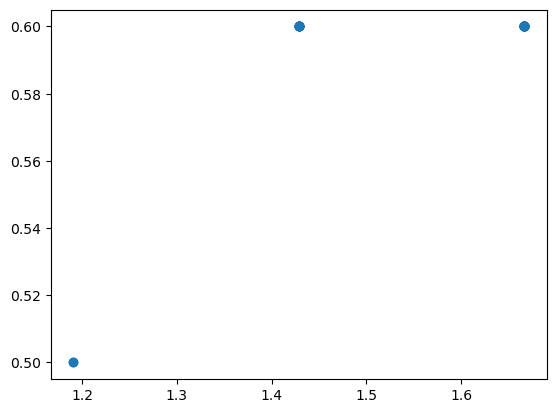

In [105]:
#Visulize the obtained rules using different plots
import matplotlib.pyplot as plt
plt.scatter(x=rules1['lift'],y=rules1['support'])

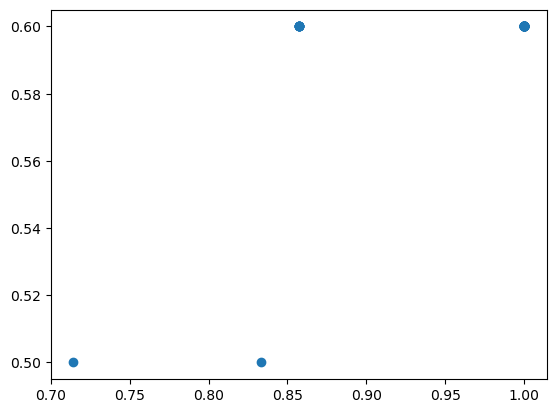

In [106]:
plt.scatter(x=rules1['confidence'],y=rules1['support'])

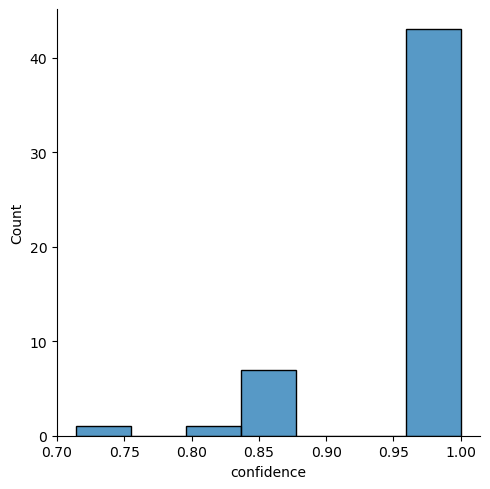

In [107]:
import seaborn as sns
sns.displot(rules1['confidence'])

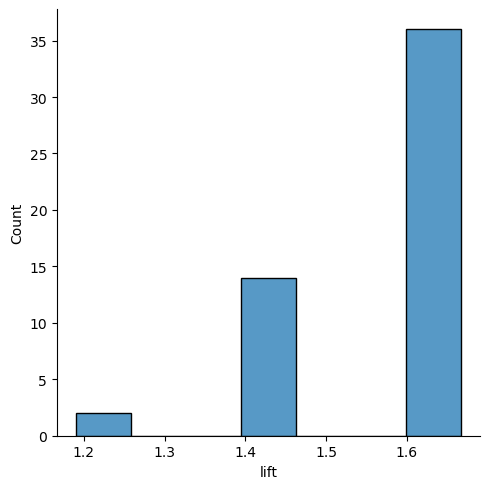

In [108]:
sns.displot(rules1['lift'])

Text(0.5, 0, 'lift')

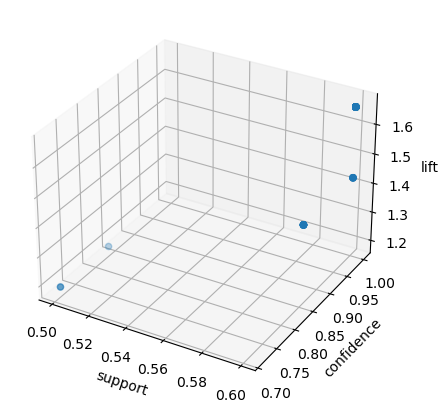

In [109]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(rules1['support'],rules1['confidence'],rules1['lift'])
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

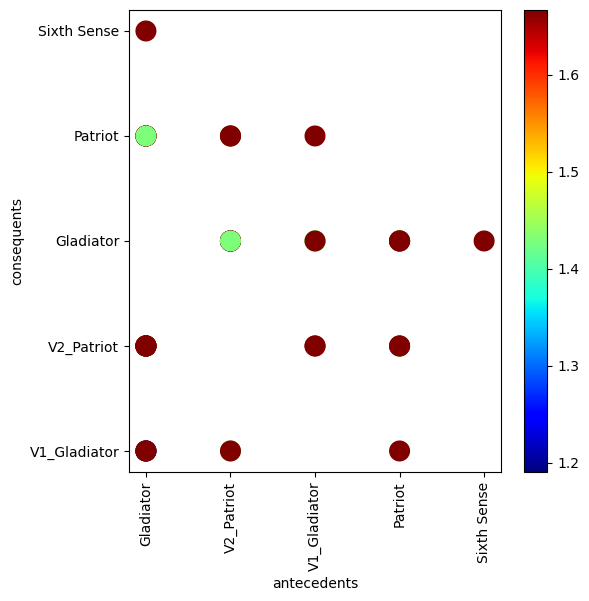

In [110]:
X = rules1.antecedents
Y = rules1.consequents
Z = rules.lift
X = X.apply(lambda x: list(x)[0]).astype("unicode")
Y = Y.apply(lambda x: list(x)[0]).astype("unicode")
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(X,Y, s = 200, c=Z, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()

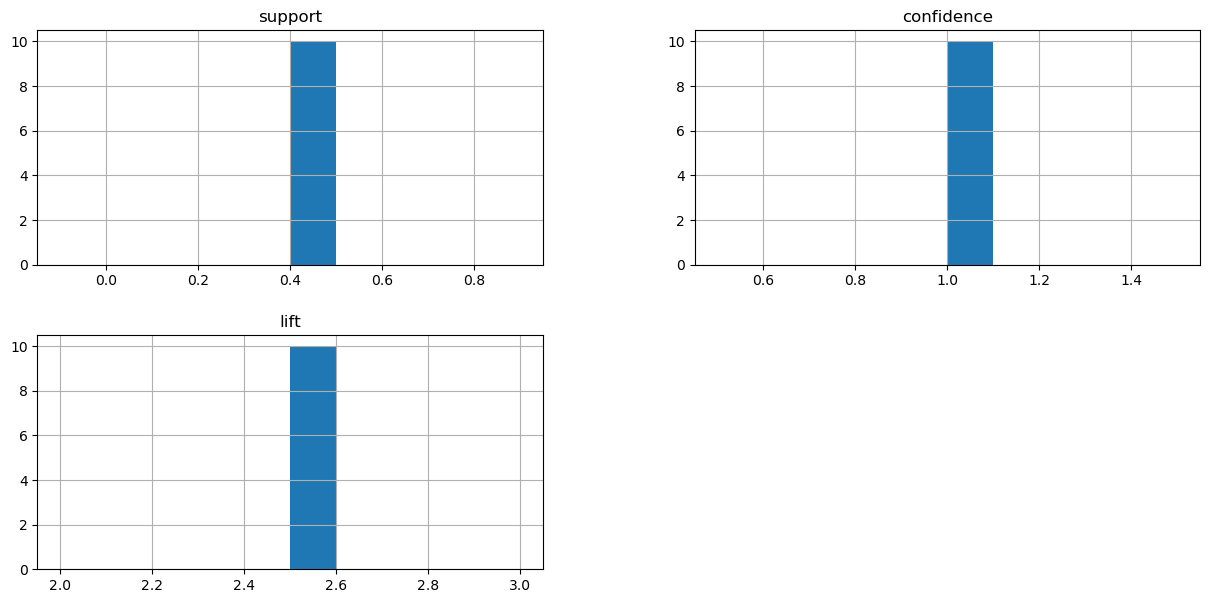

In [111]:
rules_sorted1[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [112]:
def lift_plot(table):
  plt.figure(figsize=(3,3), dpi= 300)
  sns.heatmap(table.pivot('antecedents','consequents','lift'), annot=True)
  plt.title('HeatMap - Antecedents,Consequents and Lift -Matrix',fontsize= 15)
  plt.yticks(rotation=0, fontsize= 5)
  plt.xticks(rotation=40, fontsize= 5)
  plt.show()


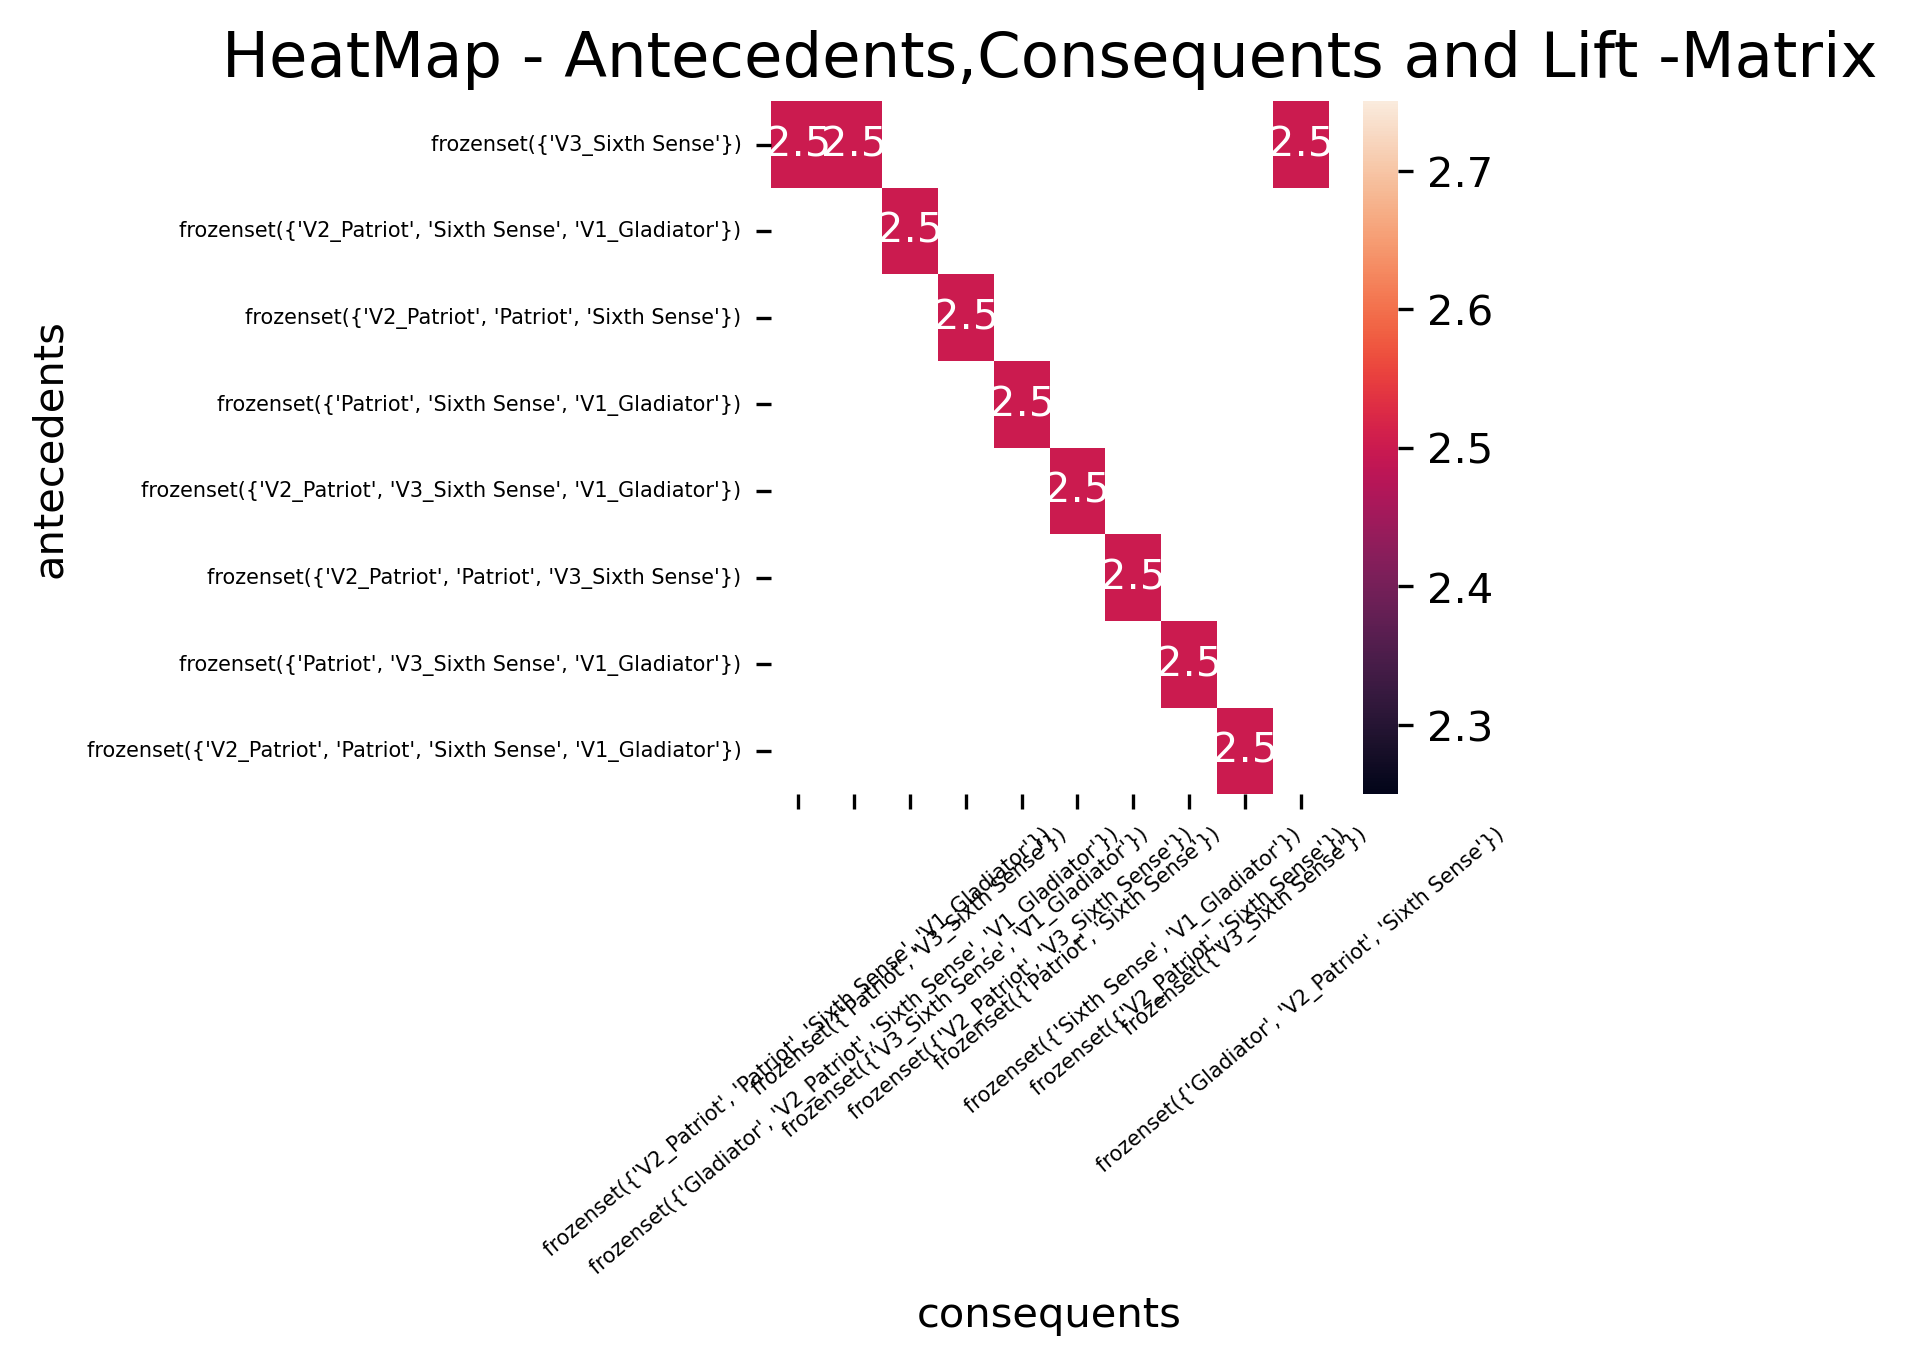

In [113]:
lift_plot(rules_sorted1)